In [ ]:
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d992ce62783bf542819c4d3d34752babdbb10ac1f257a18c191ad1e98ef5ad76
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhruvinanilshah","key":"e7f1c44d72b99cf94b400854cc49750b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c sjsu-cmpe-258-fa21-lab1

 72% 30.0M/41.4M [00:00<00:00, 161MB/s]
100% 41.4M/41.4M [00:00<00:00, 156MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "sjsu-cmpe-258-fa21-lab1.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done.')

Done.


In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, Activation
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.optimizers import SGD

In [ ]:
train_data = pd.read_csv('/content/train_data.csv',header=None)
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,52,63,45,55,68,48,62,76,63,67,86,56,80,102,57,97,118,76,85,107,62,74,97,47,94,118,63,98,121,67,84,102,59,109,128,77,123,145,80,120,...,158,179,176,147,180,180,149,176,177,147,178,180,139,171,175,124,174,178,130,173,175,140,165,170,132,171,178,134,169,176,133,170,177,133,170,177,133,164,168,128
1,74,64,62,73,63,61,77,67,65,78,68,65,79,69,64,78,68,64,78,69,64,79,67,63,80,62,60,80,63,60,81,64,62,85,69,66,85,70,67,83,...,153,147,146,148,146,145,147,149,149,151,156,156,158,161,161,163,168,167,169,167,165,168,170,168,171,174,172,175,166,164,167,163,161,164,162,160,163,162,160,163
2,70,73,87,71,74,88,71,75,88,73,76,90,74,78,91,76,79,93,77,80,93,78,80,94,77,82,99,77,86,108,80,93,120,85,104,136,90,112,148,98,...,44,5,26,42,4,25,40,6,27,42,6,28,43,6,27,42,6,27,42,7,28,43,6,26,41,5,25,40,5,24,38,3,22,35,2,21,33,1,20,33
3,69,70,5,94,102,5,96,106,1,94,96,3,90,86,5,82,79,5,75,72,2,70,65,0,90,84,9,94,91,15,34,27,2,13,4,10,2,2,1,6,...,4,101,84,7,128,109,5,136,114,4,144,117,2,150,116,5,153,112,7,155,96,5,141,78,9,108,62,5,94,43,0,84,41,2,97,70,3,125,119,3
4,19,64,102,23,75,116,12,81,122,23,109,147,25,117,151,12,101,141,9,95,143,10,95,139,16,101,136,24,112,144,23,108,142,16,96,133,39,112,152,31,...,134,113,149,136,114,152,140,119,159,150,122,164,156,133,176,171,147,188,189,154,196,200,157,202,207,148,195,203,147,197,205,131,187,193,116,176,183,103,168,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,25,16,52,42,38,55,48,47,9,9,8,28,35,25,15,23,9,37,44,30,10,16,4,5,12,0,5,12,2,13,15,7,7,9,1,34,33,25,20,...,34,69,73,43,25,23,8,39,30,23,60,51,48,57,50,49,29,24,19,24,23,12,17,15,9,13,12,6,8,8,2,18,18,11,20,20,12,21,19,11
9996,104,82,106,103,76,100,110,83,87,85,67,65,75,59,59,56,35,35,53,25,23,41,16,14,45,26,24,53,33,32,45,26,24,54,34,35,81,60,68,116,...,225,202,180,200,172,157,176,221,211,229,241,236,253,241,238,255,239,237,249,244,239,250,245,241,252,246,242,251,193,187,202,142,132,154,212,202,224,227,217,239
9997,255,255,204,253,255,203,254,255,209,255,255,206,255,255,204,255,255,204,255,255,204,255,255,204,255,255,204,255,255,204,255,255,204,255,255,204,255,255,204,255,...,135,148,151,115,151,158,122,147,153,118,140,147,110,153,160,123,157,162,126,141,147,110,147,154,116,148,156,118,153,159,121,206,207,164,246,250,199,255,255,206
9998,255,255,255,250,251,251,251,252,252,251,252,252,249,251,250,245,248,247,227,230,229,239,242,241,248,251,251,249,251,251,249,251,251,251,252,252,252,252,253,252,...,254,255,252,255,252,251,255,238,252,253,200,243,243,153,232,236,195,242,246,249,253,255,254,252,253,252,254,254,255,255,255,255,255,255,254,254,254,255,255,255


In [ ]:
print(len(train_data))

10000


In [ ]:
test_data = pd.read_csv('/content/test_data.csv',header = None)
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,43,24,1,67,28,6,83,41,17,58,29,9,28,13,2,23,15,7,27,16,5,43,26,12,59,41,23,56,52,14,79,100,29,82,116,29,83,117,31,87,...,19,62,102,12,54,100,4,52,99,3,51,100,1,54,105,3,57,104,5,55,95,8,55,87,14,46,67,15,18,26,6,10,10,5,15,10,8,18,11,3
1,34,37,42,34,37,42,33,36,41,31,35,37,31,35,36,31,35,38,31,35,37,31,36,34,31,35,34,31,35,34,31,35,34,31,35,34,30,34,33,29,...,187,182,186,185,182,186,185,183,187,186,182,187,183,183,188,183,185,189,188,185,189,188,183,187,186,180,184,183,181,185,184,182,186,185,179,183,182,178,182,181
2,209,227,247,197,224,244,189,228,252,187,222,247,191,228,254,189,228,254,188,229,253,188,229,253,188,226,254,189,225,254,189,223,252,187,221,249,185,219,247,182,...,70,135,164,72,133,161,74,136,163,82,137,165,80,134,163,75,139,164,72,138,161,70,138,161,70,139,162,73,134,159,67,133,158,66,134,159,66,131,157,65
3,83,85,64,82,84,63,91,92,71,93,91,67,94,92,64,156,145,94,215,181,122,109,71,39,116,98,71,132,119,76,127,116,73,106,96,64,108,102,75,103,...,54,147,108,55,119,80,34,111,72,29,120,76,30,120,80,36,108,72,34,101,67,30,103,71,31,99,70,33,89,62,30,78,55,24,78,54,24,74,49,21
4,243,244,245,251,252,254,251,252,252,252,253,250,252,254,247,253,253,248,254,253,248,254,252,248,254,252,249,253,251,249,251,250,250,236,237,240,229,230,235,238,...,233,247,247,245,252,252,250,253,253,251,253,253,251,253,253,251,253,253,251,253,253,251,253,253,251,253,253,251,253,253,251,253,253,251,253,253,251,253,253,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,71,58,42,71,58,42,60,47,32,79,59,45,77,54,41,72,50,37,78,58,43,77,58,41,83,64,47,81,61,46,75,53,40,81,59,47,105,84,71,121,...,105,146,140,107,110,104,72,128,122,90,148,140,104,133,123,83,138,128,89,144,137,99,136,132,99,113,109,79,89,81,55,97,80,58,115,103,79,122,114,88
1996,98,79,36,97,78,32,98,80,34,93,75,36,94,69,36,88,67,49,94,86,86,101,84,79,53,49,46,51,34,38,103,44,48,110,65,63,115,88,72,121,...,70,148,116,62,144,112,57,152,120,63,151,120,61,148,114,55,147,111,54,147,109,58,143,102,56,135,94,51,133,94,52,129,89,47,128,89,53,107,78,50
1997,177,198,109,180,203,108,189,212,119,191,212,135,185,205,141,171,189,136,138,151,115,98,106,86,67,68,61,59,56,57,61,58,61,66,63,70,73,71,83,87,...,122,129,138,122,108,115,101,99,104,91,101,103,91,101,104,85,100,106,85,103,113,92,117,130,112,104,121,101,86,106,85,69,87,69,56,73,58,39,52,40
1998,37,66,24,45,70,32,45,68,23,33,53,14,33,48,20,38,51,22,37,51,18,37,51,16,48,62,25,38,52,15,72,86,47,132,147,107,127,143,105,124,...,7,140,135,101,209,199,161,189,179,149,217,211,185,192,189,160,142,136,102,132,121,82,123,110,67,167,154,111,69,57,29,28,19,2,31,25,12,28,25,13


In [ ]:
train_label = pd.read_csv('/content/train_label.csv')
print("**************")
print("Unique lables:",sorted(train_label['label'].unique()))

**************
Unique lables: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
train_label

,id,label
0,0,65
1,1,10
2,2,71
3,3,0
4,4,67
...,...,...
9995,9995,51
9996,9996,74
9997,9997,6
9998,9998,39


In [ ]:
# correct_train_label = pd.DataFrame(train_label['label'],columns=['label'])
# correct_train_label = correct_train_label.iloc[1:,:]
# correct_train_label = correct_train_label.reset_index(drop=True)
# correct_train_label

In [ ]:
train_array = train_data.to_numpy()
train_array_reshaped=np.reshape(train_array,(-1, 32, 32, 3))
# print(train_array_reshaped)

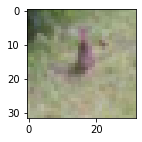

In [ ]:
plt.figure(figsize = (10,2))
plt.imshow(train_array_reshaped[0].astype(int))

In [ ]:
test_array = test_data.to_numpy()
test_array_reshaped=np.reshape(test_array,(-1, 32, 32, 3))
# print(train_array_reshaped)

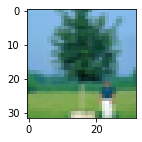

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(test_array_reshaped[-1].astype(int))

#0.3900 Accuracy Kaggle

In [ ]:
# from keras.callbacks import LearningRateScheduler
# from tensorflow.keras.optimizers import Adam
# X = train_array_reshaped
# y = to_categorical(np.array(train_label['label']))

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=25)

# X_train = X_train/255.0
# X_val = X_val/255.0

# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 50:
#         lrate = 0.0005
#     if epoch > 75:
#         lrate = 0.0003
#     if epoch > 90:
#         lrate = 0.0001
#     return lrate

# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.regularizers import l2
# model = Sequential()
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.3))
    
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(100, activation='softmax'))

# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
# model.summary()

# datagen = ImageDataGenerator(
#         featurewise_center=False,  
#         samplewise_center=False, 
#         featurewise_std_normalization=False,  
#         samplewise_std_normalization=False,  
#         zca_whitening=False,  
#         rotation_range=20,  
#         width_shift_range=0.1,  
#         height_shift_range=0.1, 
#         horizontal_flip=True, 
#         vertical_flip=False
#     )
# datagen.fit(X_train)

# history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128), epochs=100, validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])

# scores = model.evaluate(X_val, y_val, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))


#0.4833 Accuracy Kaggle: predictions_5.csv

In [ ]:
# from keras.callbacks import LearningRateScheduler
# from tensorflow.keras.optimizers import Adam
# X = train_array_reshaped
# y = to_categorical(np.array(train_label['label']))

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=15)

# X_train = X_train/255.0
# X_val = X_val/255.0

# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 75:
#         lrate = 0.0007
#     if epoch > 100:
#         lrate = 0.0005
#     if epoch > 125:
#         lrate = 0.0003
#     if epoch > 150:
#         lrate = 0.0001
#     return lrate

# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.regularizers import l2
# model = Sequential()
# model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3,3), activation='elu',kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.3))
    
# model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(512, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(100, activation='softmax'))

# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
# model.summary()

# datagen = ImageDataGenerator(
#         featurewise_center=False,  
#         samplewise_center=False, 
#         featurewise_std_normalization=False,  
#         samplewise_std_normalization=False,  
#         zca_whitening=False,  
#         rotation_range=10,  
#         width_shift_range=0.1,  
#         height_shift_range=0.1, 
#         horizontal_flip=True, 
#         vertical_flip=False
#     )
# datagen.fit(X_train)

# history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 256), epochs=160, validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])

# scores = model.evaluate(X_val, y_val, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)


## 0.4866 Accuracy Kaggle: predictions_6.csv

In [ ]:
# from keras.callbacks import LearningRateScheduler
# from tensorflow.keras.optimizers import Adam
# X = train_array_reshaped
# y = to_categorical(np.array(train_label['label']))

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=15)

# X_train = X_train/255.0
# X_val = X_val/255.0

# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 75:
#         lrate = 0.0007
#     if epoch > 100:
#         lrate = 0.0005
#     if epoch > 125:
#         lrate = 0.0003
#     if epoch > 150:
#         lrate = 0.0001
#     return lrate

# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.regularizers import l2
# model = Sequential()
# model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3,3), activation='elu',kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.3))
    
# model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(512, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(256, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(100, activation='softmax'))

# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
# model.summary()

# datagen = ImageDataGenerator(
#         featurewise_center=False,  
#         samplewise_center=False, 
#         featurewise_std_normalization=False,  
#         samplewise_std_normalization=False,  
#         zca_whitening=False,  
#         rotation_range=10,  
#         width_shift_range=0.1,  
#         height_shift_range=0.1, 
#         horizontal_flip=True, 
#         vertical_flip=False
#     )
# datagen.fit(X_train)

# history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 256), epochs=200, validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])

# scores = model.evaluate(X_val, y_val, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)

## 0.49333 Accuracy Kaggle: predictions_7.csv

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
36/36 [==============================] - 47s 330ms/step - loss: 14.6804 - accuracy: 0.0189 - val_loss: 486.0959 - val_accuracy: 0.0070
Epoch 2/200
36/36 [==============================] - 10s 284ms/step - loss: 13.8845 - accuracy: 0.0367 - val_loss: 62.0699 - val_accuracy: 0.0130
Epoch 3/200
36/36 [==============================] - 10s 285ms/step - loss: 13.1788 - accuracy: 0.0499 - val_loss: 19.2709 - val_accuracy: 0.0330
Epoch 4/200
36/36 [==============================] - 10s 287ms/step - loss: 12.5037 - accuracy: 0.0562 - val_loss: 12.0281 - val_accuracy: 0.0700
Epoch 5/200
36/36 [==============================] - 11s 289ms/step - loss: 11.8100 - accuracy: 0.0667 - val_loss: 11.4137 - val_accuracy: 0.0710
Epoch 6/200
36/36 [==============================] - 11s 290ms/step - loss: 11.1852 - accuracy: 0.0704 - val_loss: 10.9273 - val_accuracy: 0.0550
Epoch 7/200
36/36 [==============================] - 11s 293ms/step - loss: 10.5559 - accuracy: 0.0848 - val_loss: 10.3365 

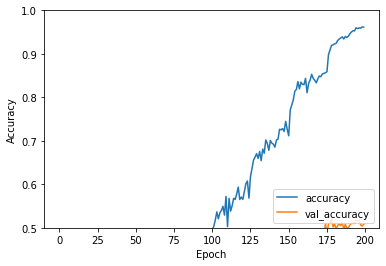

In [ ]:
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
X = train_array_reshaped
y = to_categorical(np.array(train_label['label']))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=15)

X_train = X_train/255.0
X_val = X_val/255.0

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0009
    if epoch > 100:
        lrate = 0.0007
    if epoch > 125:
        lrate = 0.0005
    if epoch > 150:
        lrate = 0.0003
    if epoch > 175:
        lrate = 0.0001
    if epoch > 190:
        lrate = 0.00005
    return lrate

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='elu',kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
    
model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(100, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
model.summary()

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False
    )
datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 256), epochs=200, validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])

scores = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)

In [ ]:
test_array_reshaped = test_array_reshaped/255.0
predictions = model.predict(test_array_reshaped)
print(predictions[1])
print(len(predictions))
predictions_list = []
for i in range(len(predictions)):
  predictions_list.append(np.argmax(predictions[i]))
# plt.figure(figsize = (15,2))
# plt.imshow((test_array_reshaped[0]*255).astype(int))
labels_id = []
for i in range(0,2000):
  labels_id.append(i)
labels_id_df = pd.DataFrame(labels_id,columns=['id'])
labels_id_df  

[2.06118508e-04 3.89422802e-03 3.21070454e-03 1.00405146e-06
 6.74484727e-06 2.81941086e-01 5.35888239e-06 7.78782778e-05
 4.35729562e-05 1.56067021e-03 1.69246539e-01 1.64420903e-03
 3.60471779e-04 1.77113689e-04 1.57390925e-04 1.24079452e-04
 2.78819294e-04 1.90209789e-06 8.45678849e-04 7.76552315e-06
 3.54498141e-02 4.33782077e-07 1.82273181e-03 1.20938486e-04
 4.20828396e-03 1.28338501e-01 3.78937577e-03 1.89155445e-03
 5.88361407e-04 2.55257124e-04 5.29151948e-05 2.28661111e-06
 4.73622084e-02 1.25251943e-04 6.88372438e-06 1.98174428e-04
 4.76784589e-05 1.21060577e-04 1.81333089e-05 2.67000613e-03
 1.05152689e-01 5.00685128e-04 5.16182354e-07 1.54426573e-07
 2.06744559e-02 2.20924313e-03 5.57321240e-04 2.54802417e-05
 1.42324952e-05 4.38067000e-05 4.51186585e-04 1.85109835e-04
 1.55358441e-06 7.20338721e-05 4.38147617e-05 5.49168675e-04
 7.03384103e-06 2.27727974e-03 1.30922790e-03 6.05009154e-06
 8.00882190e-05 1.82707154e-03 3.30812713e-06 7.41869553e-06
 7.84264193e-06 3.288899

,id
0,0
1,1
2,2
3,3
4,4
...,...
1995,1995
1996,1996
1997,1997
1998,1998


In [ ]:
y_pred_df = pd.DataFrame(predictions_list) 
final_labels_df = [labels_id_df['id'],y_pred_df[0]]
headers = ['id','label']
final_prediction_df = pd.concat(final_labels_df, axis=1, keys=headers)
final_prediction_df

,id,label
0,0,77
1,1,5
2,2,17
3,3,43
4,4,20
...,...,...
1995,1995,4
1996,1996,8
1997,1997,42
1998,1998,1


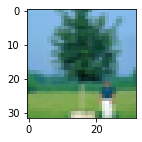

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow((test_array_reshaped[-1]*255).astype(int))

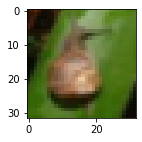

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow((test_array_reshaped[0]*255).astype(int))

In [ ]:
# final_prediction_df.to_csv('predictions_7.csv',index=False)